In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'C:\\Users\\Lenovo\\Downloads\\myexcel.xlsx'  
data = pd.read_excel('C:\\Users\\Lenovo\\Downloads\\myexcel.xlsx')

In [3]:
# Set the style for visualizations

sns.set(style="whitegrid")

In [4]:
# Preprocessing: Replace "Height" column values with random numbers between 150 and 180

np.random.seed(0)
data['Height'] = np.random.randint(150, 181, size=data.shape[0])

In [5]:
# Task 1: Distribution of employees across each team and percentage split


team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / len(data) * 100).round(2)

In [6]:
# Task 2: Segregation of employees based on positions

position_distribution = data['Position'].value_counts()

In [7]:
# Task 3: Predominant age group

age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = data['Age_Group'].value_counts()

In [8]:
# Task 4: Team and Position with highest salary expenditure


team_salary_expenditure = data.groupby('Team')['Salary'].sum()
position_salary_expenditure = data.groupby('Position')['Salary'].sum()
highest_salary_team = team_salary_expenditure.idxmax(), team_salary_expenditure.max()
highest_salary_position = position_salary_expenditure.idxmax(), position_salary_expenditure.max()


In [9]:
# Task 5: Correlation between Age and Salary

correlation_age_salary = data[['Age', 'Salary']].corr().iloc[0, 1]

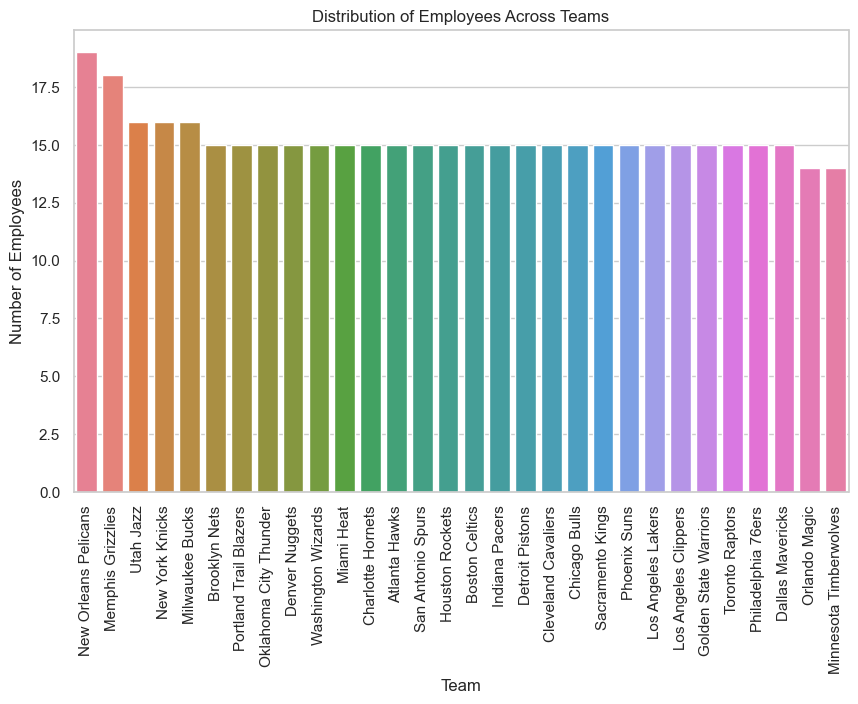

In [22]:
colors = sns.color_palette("husl", len(team_distribution))

team_df = team_distribution.reset_index()
team_df.columns = ['Team', 'Count']

# Visualization for Task 1: Team distribution and percentage split with different colors

plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Count', data=team_df, palette=colors, hue='Team', dodge=False, legend=False)
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

In [28]:
colors = sns.color_palette("husl", len(position_distribution))

position_df = position_distribution.reset_index()
position_df.columns = ['Position', 'Count']

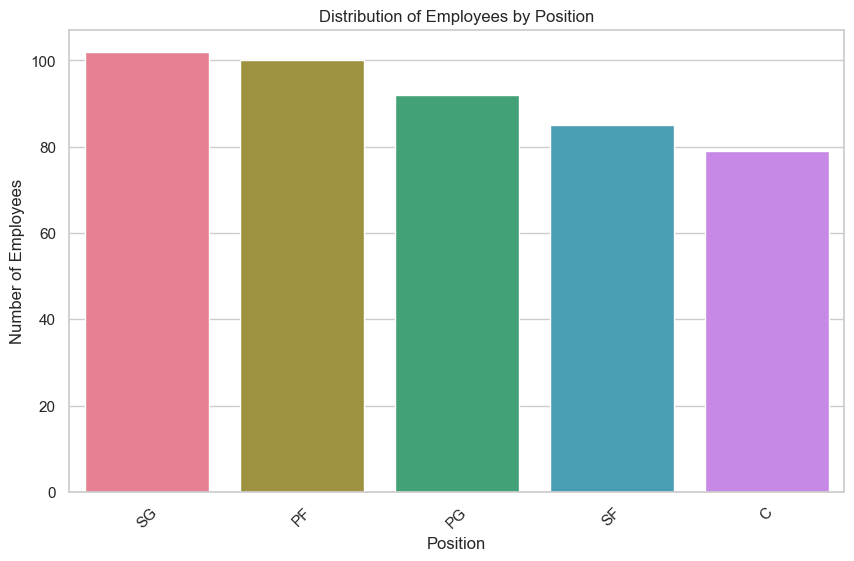

In [30]:
# Visualization for Task 2: Position distribution with different colors

plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Count', data=position_df, palette=colors, hue='Position', dodge=False, legend=False)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

In [32]:
team_salary_expenditure_sorted = team_salary_expenditure.sort_values(ascending=False)


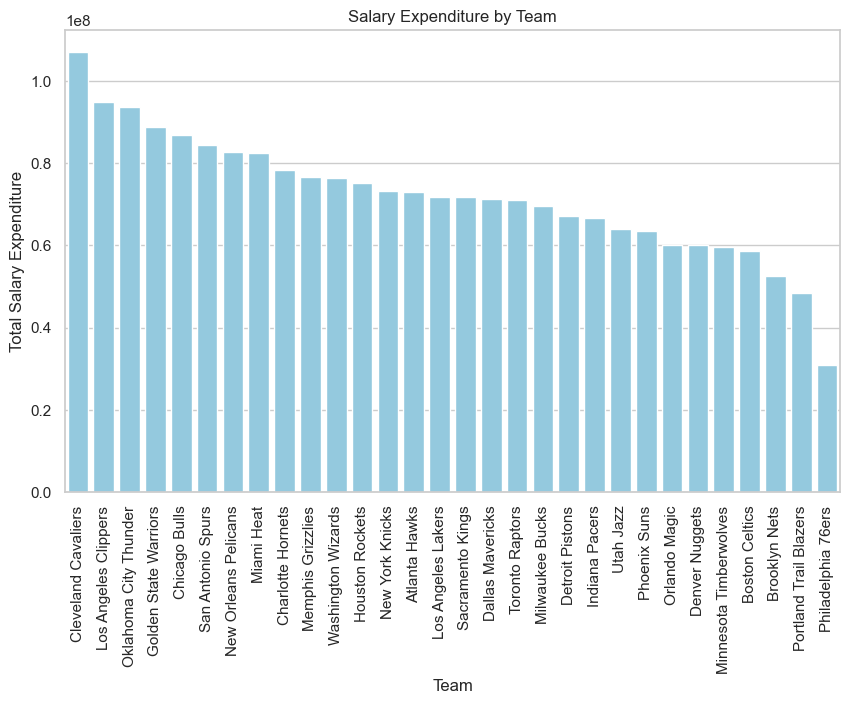

In [36]:
# Visualization for Task 4: Salary Expenditure by Team 

plt.figure(figsize=(10, 6))
sns.barplot(x=team_salary_expenditure_sorted.index, y=team_salary_expenditure_sorted.values, color='skyblue')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=90)
plt.show()

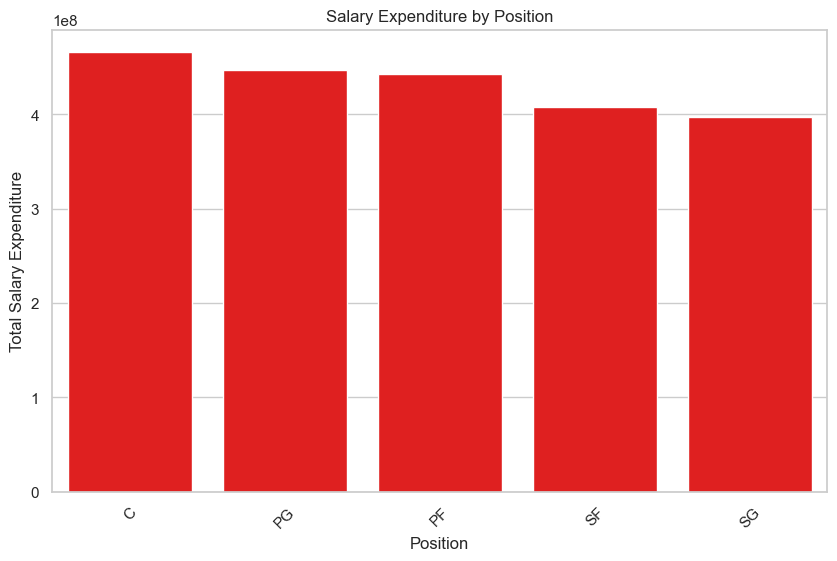

In [40]:
position_salary_expenditure_sorted = position_salary_expenditure.sort_values(ascending=False)

# Visualization for Task 4: Salary Expenditure by Position with red bars

plt.figure(figsize=(10, 6))
sns.barplot(x=position_salary_expenditure_sorted.index, y=position_salary_expenditure_sorted.values, color='red')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

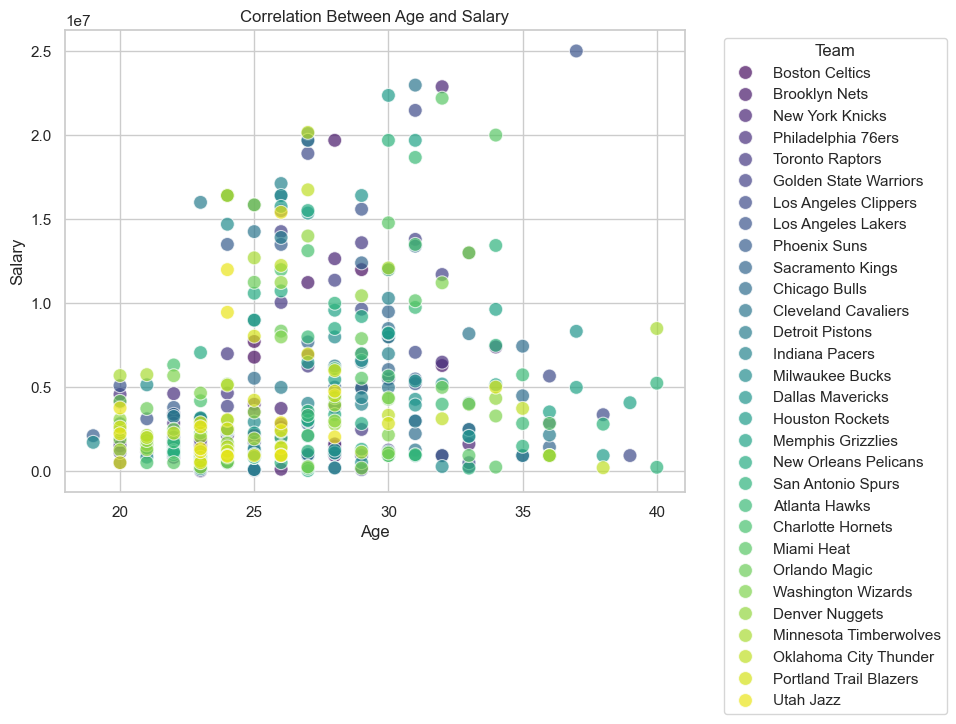

In [42]:
# Visualization for Task 5: Correlation between Age and Salary 

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=data, hue='Team', palette='viridis', s=100, alpha=0.7)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
# Summary and Insights

print("Team Percentage Distribution:\n", team_percentage)

Team Percentage Distribution:
 Team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Brooklyn Nets             3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Miami Heat                3.28
Charlotte Hornets         3.28
Atlanta Hawks             3.28
San Antonio Spurs         3.28
Houston Rockets           3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Sacramento Kings          3.28
Phoenix Suns              3.28
Los Angeles Lakers        3.28
Los Angeles Clippers      3.28
Golden State Warriors     3.28
Toronto Raptors           3.28
Philadelphia 76ers        3.28
Dallas Mavericks          3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: count, dtype: float64


In [48]:
print("\nTeam with Highest Salary Expenditure:", highest_salary_team)


Team with Highest Salary Expenditure: ('Cleveland Cavaliers', 106988689.0)


In [50]:
print("Position with Highest Salary Expenditure:", highest_salary_position)

Position with Highest Salary Expenditure: ('C', 466377332.0)


In [52]:
print("Correlation between Age and Salary:", correlation_age_salary)

Correlation between Age and Salary: 0.21400941226570955
